In the following plots, we look at three observables as a function of delta for the entire delta range $[-1.545,13.455]$. For the energy, $\langle H \rangle$, and the staggered magnetization, $\langle m_{st}\rangle$, I compare the RNN's to the QMC values. For the expectation value of the sigma x operator, $\langle \sigma_x \rangle$, the comparison is not possible, though we are able to explore this using the trained RNNs. 

In [1]:
import numpy as np
deltas = np.arange(-1.545,13.5,0.5)

# Dependencies

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import tensorflow as tf
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

In [141]:
import sys
sys.path.append('../..')
from stag_mag import calculate_stag_mag
from energy_func import buildlattice, construct_mats
from sigma_x import calculate_sigma_x
from train_VMC import Train_w_VMC
from train_hybrid import Train_w_Data_then_VMC

# Read in Data

### QMC Data

In [5]:
df = pd.read_csv('./../data/N_256/avg_observables.csv', sep=',')
deltas = np.array(df["delta"])
energies = np.array(df["energy"])
e_errors = np.array(df["energy_error"])
chks = np.array(df["chk"])
chk_errors = np.array(df["chk_error"])
print(chks)

[0.01934219 0.02031695 0.02147242 0.02271672 0.02414812 0.0256625
 0.02765422 0.02978184 0.03218281 0.03646844 0.0432709  0.05313914
 0.10297383 0.23432902 0.28473828 0.31636277 0.34034262 0.36021145
 0.37688512 0.39131465 0.40332238 0.4140282  0.42324586 0.43198043
 0.43875293 0.44474688 0.44996219 0.45428016 0.45779867 0.46108863
 0.46369348]


### Previously Calculated Observables

In [129]:
load_stagmags2 = np.load('./../data/N_256/Figure3/TwoD_rnn/VMCstagmags.npy')
load_stagmags2_vars = np.load('./../data/N_256/Figure3/TwoD_rnn/VMCstagmags_vars.npy')

hybrid_stagmags2 = np.load('./../data/N_256/Figure3/TwoD_rnn/Hybrid_stagmags2.npy')
hybrid_stagmags2_vars = np.load('./../data/N_256/Figure3/TwoD_rnn/Hybrid_stagmags2_vars.npy')

load_stagmags1 = np.load('./../data/N_256/Figure3/OneD_rnn/VMCstagmags.npy')
load_stagmags1_vars = np.load('./../data/N_256/Figure3/OneD_rnn/VMCstagmags_vars.npy')

load_sigxs2 = np.load('./../data/N_256/Figure3/TwoD_rnn/VMCsigxs.npy')
load_sigxs2_vars = np.load('./../data/N_256/Figure3/TwoD_rnn/VMCsigxs_vars.npy')

load_sigxs1 = np.load('./../data/N_256/Figure3/OneD_rnn/VMCsigxs.npy')
load_sigxs1_vars = np.load('./../data/N_256/Figure3/OneD_rnn/VMCsigxs_vars.npy')

hybrid_stagmags1 = np.load('./../data/N_256/Figure3/OneD_rnn/Hybrid_stagmags.npy')
hybrid_stagmags1_vars = np.load('./../data/N_256/Figure3/OneD_rnn/Hybrid_stagmags_vars.npy')

exp_data_stagmags = np.load('./../data/N_256/Figure3/exp_stagmags.npy')
exp_data_vars = np.load('./../data/N_256/Figure3/exp_stagmags_vars.npy')

hybrid_sigxs = np.load('./../data/N_256/Figure3/OneD_rnn/hybrid1d_sigxs.npy')
hybrid_sigxs_vars = np.load('./../data/N_256/Figure3/OneD_rnn/hybrid1d_sigxs_vars.npy')

hybrid_sigxs2 = np.load('./../data/N_256/Figure3/TwoD_rnn/hybrid2d_sigxs.npy')
hybrid_sigxs2_vars = np.load('./../data/N_256/Figure3/TwoD_rnn/hybrid2d_sigxs_vars.npy')

vmc_sigxx2 = np.load('./../data/N_256/Figure3/TwoD_rnn/vmc2d_sigxx.npy')
vmc_sigxx2_vars = np.load('./../data/N_256/Figure3/TwoD_rnn/vmc2d_sigxx_vars.npy')

# THIS IS ACTUALLY THE HYBRID ONE!
hybrid_sigxx1 = np.load('./../data/N_256/Figure3/OneD_rnn/vmc1d_sigxx.npy')
hybrid_sigxx1_vars = np.load('./../data/N_256/Figure3/OneD_rnn/vmc1d_sigxx_vars.npy')

hybrid_sigxx2 = np.load('./../data/N_256/Figure3/TwoD_rnn/hybrid2d_sigxx.npy')
hybrid_sigxx2_vars = np.load('./../data/N_256/Figure3/TwoD_rnn/hybrid2d_sigxx_vars.npy')

vmc_sigxx1 = np.load('./../data/N_256/Figure3/OneD_rnn/vmc_sigxx.npy')
vmc_sigxx1_vars = np.load('./../data/N_256/Figure3/OneD_rnn/vmc_sigxx_vars.npy')

# Slowly populate these plots

These plots show standard DEVIATION (which is why they are large for RNNs and exp data)

In [7]:
purples = plt.get_cmap('Purples')
oranges = plt.get_cmap('Oranges')

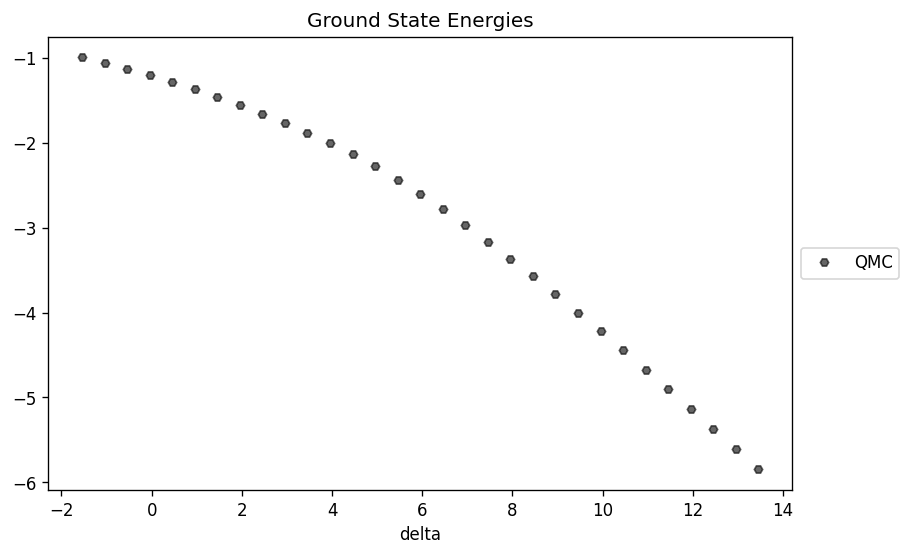

In [8]:
fig = plt.figure(1,figsize=(8,5), dpi=120, facecolor='w', edgecolor='k')
plt.errorbar(deltas, energies, marker='H', markerfacecolor='k', markeredgecolor='k', markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color='k',label="QMC")
plt.title('Ground State Energies')
plt.xlabel('delta')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

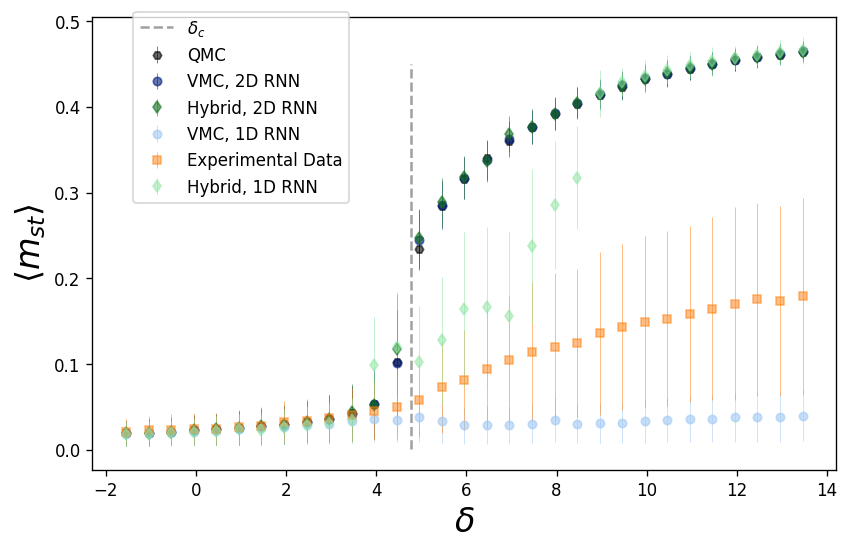

In [145]:
fig = plt.figure(1,figsize=(8,5), dpi=120, facecolor='w', edgecolor='k')
colors1 = sns.color_palette('pastel')
colors2 = sns.color_palette('dark')
plt.errorbar(deltas, chks, yerr=chk_errors, marker='H', markerfacecolor='k', markeredgecolor='k', markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color='k',label="QMC")
plt.errorbar(deltas, load_stagmags2, yerr=np.sqrt(load_stagmags2_vars), marker='o', markerfacecolor=colors2[0], markeredgecolor=colors2[0], markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color=colors2[0],label ="VMC, 2D RNN")
plt.errorbar(deltas, hybrid_stagmags2, yerr=np.sqrt(hybrid_stagmags2_vars), marker='d', markerfacecolor=colors2[2], markeredgecolor=colors2[2], markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color=colors2[2],label ="Hybrid, 2D RNN")
plt.errorbar(deltas, load_stagmags1, yerr=np.sqrt(load_stagmags1_vars), marker='o', markerfacecolor=colors1[0], markeredgecolor=colors1[0], markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color=colors1[0],label ="VMC, 1D RNN")
plt.errorbar(deltas, exp_data_stagmags, yerr=np.sqrt(exp_data_vars), marker='s', markerfacecolor='C1', markeredgecolor='C1', markersize=5, linewidth=0.6, alpha=0.5, linestyle='None', color='C1',label="Experimental Data")
plt.errorbar(deltas, hybrid_stagmags1, yerr=np.sqrt(hybrid_stagmags1_vars), marker='d', markerfacecolor=colors1[2], markeredgecolor=colors1[2], markersize=5, linewidth=0.6, alpha=0.5, linestyle='None', color=colors1[2],label ="Hybrid, 1D RNN")
plt.vlines(4.765,0.001,0.45,linestyle='--',color='grey',alpha=0.75,label ='$\\delta_c$')

# plt.scatter(deltas,load_stagmags2,color=colors2[0],label ="VMC, 2D RNN")
# plt.scatter(deltas,load_stagmags1,color=colors1[0],label ="VMC, 1D RNN")
# plt.scatter(deltas,hybrid_stagmags1,color=colors1[2],label ="Hybrid, 1D RNN")

# plt.title('Staggered Magnetization')
plt.ylabel('$\\langle m_{st} \\rangle$',fontsize=20)
plt.xlabel('$\\delta$',fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(0.2, 0.8))
plt.show()

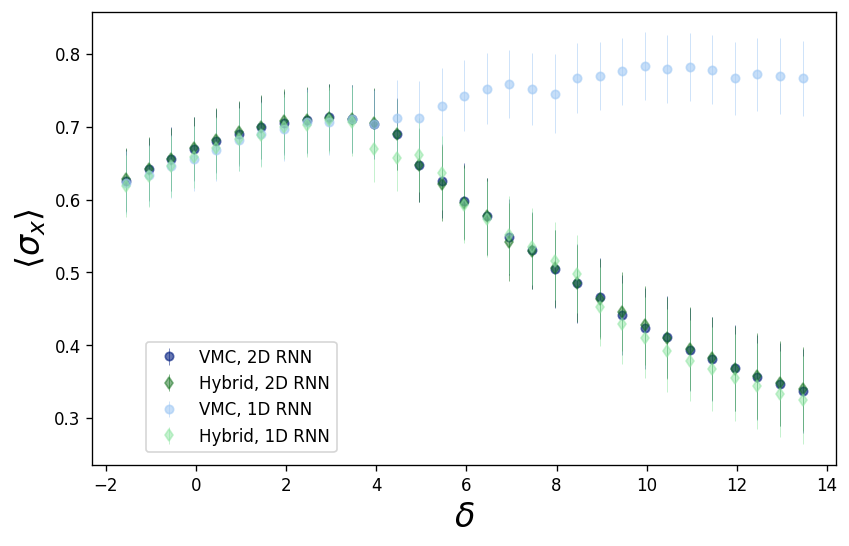

In [30]:
fig = plt.figure(1,figsize=(8,5), dpi=120, facecolor='w', edgecolor='k')
colors1 = sns.color_palette('pastel')
colors2 = sns.color_palette('dark')
plt.errorbar(deltas, load_sigxs2, yerr=np.sqrt(load_sigxs2_vars), marker='o', markerfacecolor=colors2[0], markeredgecolor=colors2[0], markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color=colors2[0],label ="VMC, 2D RNN")
plt.errorbar(deltas, hybrid_sigxs2, yerr=np.sqrt(hybrid_sigxs2_vars), marker='d', markerfacecolor=colors2[2], markeredgecolor=colors2[2], markersize=5, linewidth=0.6, alpha=0.5, linestyle='None', color=colors2[2],label ="Hybrid, 2D RNN")
plt.errorbar(deltas, load_sigxs1, yerr=np.sqrt(load_sigxs1_vars), marker='o', markerfacecolor=colors1[0], markeredgecolor=colors1[0], markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color=colors1[0],label ="VMC, 1D RNN")
plt.errorbar(deltas, hybrid_sigxs, yerr=np.sqrt(hybrid_sigxs_vars), marker='d', markerfacecolor=colors1[2], markeredgecolor=colors1[2], markersize=5, linewidth=0.6, alpha=0.5, linestyle='None', color=colors1[2],label ="Hybrid, 1D RNN")
# plt.title('Sigma X')
plt.xlabel('$\\delta$',fontsize=20)
plt.ylabel('$\\langle \\sigma_{x} \\rangle$',fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(0.2, 0.15))
plt.show()

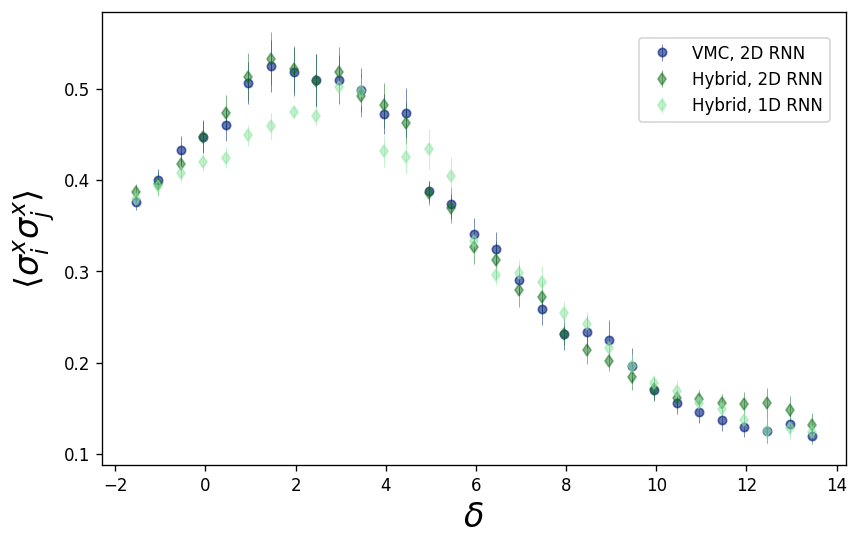

In [133]:
fig = plt.figure(1,figsize=(8,5), dpi=120, facecolor='w', edgecolor='k')
colors1 = sns.color_palette('pastel')
colors2 = sns.color_palette('dark')
plt.errorbar(deltas, vmc_sigxx2, yerr=np.sqrt(vmc_sigxx2_vars)/np.sqrt(10), marker='o', markerfacecolor=colors2[0], markeredgecolor=colors2[0], markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color=colors2[0],label ="VMC, 2D RNN")
plt.errorbar(deltas, hybrid_sigxx2, yerr=np.sqrt(hybrid_sigxx2_vars)/np.sqrt(10), marker='d', markerfacecolor=colors2[2], markeredgecolor=colors2[2], markersize=5, linewidth=0.6, alpha=0.5, linestyle='None', color=colors2[2],label ="Hybrid, 2D RNN")
plt.errorbar(deltas, vmc_sigxx1, yerr=np.sqrt(vmc_sigxx1_vars), marker='o', markerfacecolor=colors1[0], markeredgecolor=colors1[0], markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color=colors1[0],label ="VMC, 1D RNN")
plt.errorbar(deltas, hybrid_sigxx1, yerr=np.sqrt(hybrid_sigxx1_vars)/np.sqrt(10), marker='d', markerfacecolor=colors1[2], markeredgecolor=colors1[2], markersize=5, linewidth=0.6, alpha=0.5, linestyle='None', color=colors1[2],label ="Hybrid, 1D RNN")
# plt.title('Sigma X')
plt.xlabel('$\\delta$',fontsize=20)
plt.ylabel('$\\langle \\sigma^{x}_i \\sigma^{x}_j \\rangle$',fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(0.85, 0.85))
plt.show()

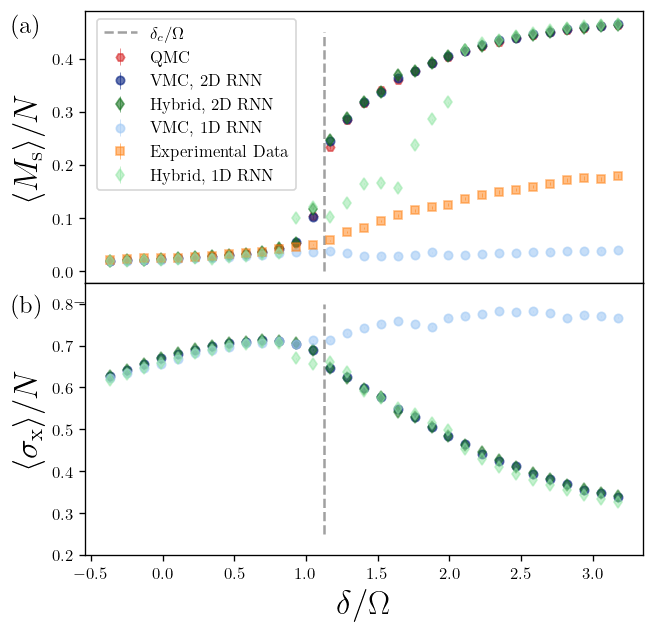

In [166]:
plt.rcParams.update({"text.usetex":True,"font.family": "Helvetica"})

fig = plt.figure(1,figsize=(6,6), dpi=120, facecolor='w', edgecolor='k')
grid = plt.GridSpec(2, 1, wspace=0.4, hspace=0)
ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[1,0],sharex=ax1)
colors1 = sns.color_palette('pastel')
colors2 = sns.color_palette('dark')
d_o = deltas/4.24

# stag mags
ax1.errorbar(d_o, chks, yerr=chk_errors, marker='H', markerfacecolor='C3', markeredgecolor='C3', markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color='C3',label="QMC")
ax1.errorbar(d_o, load_stagmags2, yerr=np.sqrt(load_stagmags2_vars)/np.sqrt(10000), marker='o', markerfacecolor=colors2[0], markeredgecolor=colors2[0], markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color=colors2[0],label ="VMC, 2D RNN")
ax1.errorbar(d_o, hybrid_stagmags2, yerr=np.sqrt(hybrid_stagmags2_vars)/np.sqrt(10000), marker='d', markerfacecolor=colors2[2], markeredgecolor=colors2[2], markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color=colors2[2],label ="Hybrid, 2D RNN")
ax1.errorbar(d_o, load_stagmags1, yerr=np.sqrt(load_stagmags1_vars)/np.sqrt(10000), marker='o', markerfacecolor=colors1[0], markeredgecolor=colors1[0], markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color=colors1[0],label ="VMC, 1D RNN")
ax1.errorbar(d_o, exp_data_stagmags, yerr=np.sqrt(exp_data_vars)/np.sqrt(1000), marker='s', markerfacecolor='C1', markeredgecolor='C1', markersize=5, linewidth=0.6, alpha=0.5, linestyle='None', color='C1',label="Experimental Data")
ax1.errorbar(d_o, hybrid_stagmags1, yerr=np.sqrt(hybrid_stagmags1_vars)/np.sqrt(10000), marker='d', markerfacecolor=colors1[2], markeredgecolor=colors1[2], markersize=5, linewidth=0.6, alpha=0.5, linestyle='None', color=colors1[2],label ="Hybrid, 1D RNN")
ax1.vlines(4.765/4.24,0.001,0.45,linestyle='--',color='grey',alpha=0.75,label ='$\\delta_c/\\Omega$')
ax1.set_ylabel('$\\langle M_{\mathrm{s}} \\rangle/N$',fontsize=20)
ax1.text(-1.05, 0.45, "(a)",fontsize=15)

    
# sigma x
# ax2.errorbar(-1.545, 0.625598, yerr=8.3e-7, marker='H', markerfacecolor='C3', markeredgecolor='C3', markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color='C3')
# ax2.errorbar(4.455, 0.687168, yerr=7.6e-6, marker='H', markerfacecolor='C3', markeredgecolor='C3', markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color='C3')
# ax2.errorbar(4.955, 0.651883, yerr=7.5e-6, marker='H', markerfacecolor='C3', markeredgecolor='C3', markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color='C3')
# ax2.errorbar(13.455, 0.338416, yerr=3.1e-6, marker='H', markerfacecolor='C3', markeredgecolor='C3', markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color='C3')
ax2.errorbar(d_o, load_sigxs2, yerr=np.sqrt(load_sigxs2_vars)/np.sqrt(10000), marker='o', markerfacecolor=colors2[0], markeredgecolor=colors2[0], markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color=colors2[0])
ax2.errorbar(d_o, hybrid_sigxs2, yerr=np.sqrt(hybrid_sigxs2_vars)/np.sqrt(10000), marker='d', markerfacecolor=colors2[2], markeredgecolor=colors2[2], markersize=5, linewidth=0.6, alpha=0.5, linestyle='None', color=colors2[2])
ax2.errorbar(d_o, load_sigxs1, yerr=np.sqrt(load_sigxs1_vars)/np.sqrt(10000), marker='o', markerfacecolor=colors1[0], markeredgecolor=colors1[0], markersize=5, linewidth=0.5, alpha=0.6, linestyle='None', color=colors1[0])
ax2.errorbar(d_o, hybrid_sigxs, yerr=np.sqrt(hybrid_sigxs_vars)/np.sqrt(10000), marker='d', markerfacecolor=colors1[2], markeredgecolor=colors1[2], markersize=5, linewidth=0.6, alpha=0.5, linestyle='None', color=colors1[2])
ax2.vlines(4.765/4.24,0.25,0.8,linestyle='--',color='grey',alpha=0.75)
ax2.set_ylabel('$\\langle \\sigma_{\mathrm{x}} \\rangle/N$',fontsize=20)
ax2.set_ylim(0.2,0.85)
ax2.text(-1.05, 0.78, "(b)",fontsize=15)

fig.legend(loc='center', bbox_to_anchor=(0.28, 0.75))
plt.xlabel('$ \delta/\\Omega $',fontsize=20)
plt.show()

-1.545	0.625598±8.3e-7
4.455	0.687168±7.6e-6
4.955	0.651883±7.5e-6
13.455	0.338416±3.1e-6

In [31]:
print(exp_data_stagmags)

[0.02093359 0.02267969 0.02373828 0.02476172 0.02463672 0.02698828
 0.02835156 0.03244141 0.03375    0.03678516 0.04079297 0.04591797
 0.04970313 0.05774609 0.07288281 0.08159375 0.09417969 0.10495703
 0.11425781 0.12001563 0.12449219 0.13593359 0.14333984 0.14898828
 0.15318359 0.15864453 0.16452734 0.17071484 0.17548437 0.17372266
 0.17921484]


# Calculate $m_{st}$ from Trained Model

In [12]:
def stag_mag_of_models(path, nsamples, batch_size, stagmag_fxn, VMC_train_fxn):
    
    # -- get config
    d = {}
    with open(path+"config.txt") as f:
        for line in f:
            (key, val) = line.strip().split('=')
            if key=='name' or key=='RNN':
                val = str(val)
            if key=='Lx' or key=='Ly' or key=='sweep_rate' or key=='nh' or key=='trunc' or key=='seed' or key=='VMC_epochs' or key=='Data_epochs' or key=='ns':
                val = int(val)
            if key=='V'or key=='Omega' or key=='delta' or key=='lr':
                val = float(val)
            if key=='weight_sharing' or key=='MDGRU' or key=='batch_samples' or key=='Print' or key=='Write_Data' or key=='CKPT':
                val = bool(key)
            d[key] = val
            d['Load_Only'] = True
            d['Print'] = False
            
    # -- reload model
    model,_,_,_ = VMC_train_fxn(d)
    
    # -- draw samples & calculate stag mags
    batchsize = batch_size
    if nsamples > batchsize:
        batches = int((nsamples-(nsamples%batchsize))/batchsize)
        all_stagmags = []
        for i in range(batches):
            samples,_ = model.sample(batchsize)
            stagmags,_,_,_ = stagmag_fxn(d['Lx'],d['Ly'],samples.numpy())
            all_stagmags.append(abs(stagmags))
        
    # -- take averages
    stagmag = np.mean(all_stagmags)
    var = np.var(all_stagmags)
    
    return stagmag, var

stag_mags1 = []
vars_1 = []
stag_mags2 = []
vars_2 = []
for i in range(len(deltas)):
    delta = float("{:.3f}".format(deltas[i]))
    print(delta)
    path1 = f'./../data/N_256/Figure3/OneD_rnn/delta_{delta}/seed_111/VMC_only/'
    path2 = f'./../data/N_256/Figure3/TwoD_rnn/delta_{delta}/seed_111/VMC_only/'
    print("One D RNN")
    stag_mag1,var1 = stag_mag_of_VMC_models(path1,10000,500,calculate_stag_mag,Train_w_VMC)
    stag_mags1.append(stag_mag1)
    vars_1.append(var1)
    print("Two D RNN")
    stag_mag2,var2 = stag_mag_of_VMC_models(path2,10000,500,calculate_stag_mag,Train_w_VMC)
    stag_mags2.append(stag_mag2)
    vars_2.append(var2)

np.save('./../data/N_256/Figure3/OneD_rnn/VMCstagmags',stag_mags1)
np.save('./../data/N_256/Figure3/OneD_rnn/VMCstagmags_vars',vars_1)
np.save('./../data/N_256/Figure3/TwoD_rnn/VMCstagmags',stag_mags2)
np.save('./../data/N_256/Figure3/TwoD_rnn/VMCstagmags_vars',vars_2)

stag_mags1 = []
vars_1 = []
stag_mags2 = []
vars_2 = []
deltas=np.array([1.455])
for i in range(len(deltas)):
    delta = float("{:.3f}".format(deltas[i]))
    print(delta)
    path1 = f'./../data/N_256/Figure3/OneD_rnn/delta_{delta}/seed_111/VMC_only/'
    path2 = f'./../data/N_256/Figure3/TwoD_rnn/delta_{delta}/seed_111/VMC_only/'
    print("One D RNN")
    stag_mag1,var1 = stag_mag_of_VMC_models(path1,10000,500,calculate_stag_mag,Train_w_VMC)
    stag_mags1.append(stag_mag1)
    vars_1.append(var1)
    print("Two D RNN")
    stag_mag2,var2 = stag_mag_of_VMC_models(path2,10000,500,calculate_stag_mag,Train_w_VMC)
    stag_mags2.append(stag_mag2)
    vars_2.append(var2)

In [15]:
stag_mags2 = []
vars_2 = []

for i in range(len(deltas)):
    delta = float("{:.3f}".format(deltas[i]))
    print(delta)
    path1 = f'./../data/N_256/Figure3/TwoD_rnn/delta_{delta}/seed_111/hybrid_training/lr_0.001/100_datasteps/'
    stag_mag1,var1 = stag_mag_of_models(path1,10000,500,calculate_stag_mag,Train_w_Data_then_VMC)
    print(stag_mag1,"+/-",np.sqrt(var1))
    stag_mags2.append(stag_mag1)
    vars_2.append(var1)

-1.545
Using GRU cell.
The sum of params is 4674
getting energy function!
Restoring the fully trained model from ./../data/N_256/Figure3/TwoD_rnn/delta_-1.545/seed_111/hybrid_training/lr_0.001/100_datasteps/ckpt-210.
0.0192453125 +/- 0.014601770330249128
-1.045
Using GRU cell.
The sum of params is 4674
getting energy function!
Restoring the fully trained model from ./../data/N_256/Figure3/TwoD_rnn/delta_-1.045/seed_111/hybrid_training/lr_0.001/100_datasteps/ckpt-210.
0.020320703125 +/- 0.015406408264709086
-0.545
Using GRU cell.
The sum of params is 4674
getting energy function!
Restoring the fully trained model from ./../data/N_256/Figure3/TwoD_rnn/delta_-0.545/seed_111/hybrid_training/lr_0.001/100_datasteps/ckpt-210.
0.021368359375 +/- 0.016150876081106432
-0.045
Using GRU cell.
The sum of params is 4674
getting energy function!
Restoring the fully trained model from ./../data/N_256/Figure3/TwoD_rnn/delta_-0.045/seed_111/hybrid_training/lr_0.001/100_datasteps/ckpt-210.
0.022762109375

In [20]:
np.save('./../data/N_256/Figure3/TwoD_rnn/Hybrid_stagmags2',stag_mags2)
np.save('./../data/N_256/Figure3/TwoD_rnn/Hybrid_stagmags2_vars',vars_2)

np.save('./../data/N_256/Figure3/OneD_rnn/Hybrid_stagmags',stag_mags1)
np.save('./../data/N_256/Figure3/OneD_rnn/Hybrid_stagmags_vars',vars_1)

# Calculate $\sigma_x$ from Trained Model

In [16]:
interactions = buildlattice(16,16,trunc=100)
omega_matrix,_,_ = construct_mats(interactions,256)

def sigma_x_of_models(path, nsamples, batch_size, O_mat, sigx_fxn, VMC_train_fxn):
    
    # -- get config
    d = {}
    with open(path+"config.txt") as f:
        for line in f:
            (key, val) = line.strip().split('=')
            if key=='name' or key=='RNN':
                val = str(val)
            if key=='Lx' or key=='Ly' or key=='sweep_rate' or key=='nh' or key=='trunc' or key=='seed' or key=='VMC_epochs' or key=='Data_epochs' or key=='ns':
                val = int(val)
            if key=='V'or key=='Omega' or key=='delta' or key=='lr':
                val = float(val)
            if key=='weight_sharing' or key=='MDGRU' or key=='batch_samples' or key=='Print' or key=='Write_Data' or key=='CKPT':
                val = bool(key)
            d[key] = val
            d['Load_Only'] = True
            d['Print'] = False
            
    # -- reload model
    model,_,_,_ = VMC_train_fxn(d)
    
    # -- draw samples & calculate stag mags
    batchsize = batch_size
    if nsamples >= batchsize:
        batches = int((nsamples-(nsamples%batchsize))/batchsize)
        all_sigma_xs = []
        sigma_xs_per_site = np.zeros((1,256))
        for i in range(batches):
            print(f"Batch #{i}")
            samples,_ = model.sample(batchsize)
            sigma_xs,sigx_all_sites = sigx_fxn(O_mat, samples, model.logpsi)
            all_sigma_xs.append(sigma_xs)
            sigma_xs_per_site = np.append(sigma_xs_per_site,sigx_all_sites,axis=0)
        
    # -- take averages
    sigma_x = np.mean(all_sigma_xs)
    var = np.var(all_sigma_xs)
    sigma_xs_per_site = sigma_xs_per_site[1:,:]
    sigx_per_site = np.mean(sigma_xs_per_site,axis=0)
    var_per_site = np.var(sigma_xs_per_site,axis=0)
    
    return sigma_x, var, sigx_per_site, var_per_site


sigxs1 = []
sigxs2 = []
vars1 = []
vars2 = []
sigxs_all_sites1 = np.zeros((1,256))
sigxs_all_sites2 = np.zeros((1,256))
vars_all_sites1 = np.zeros((1,256))
vars_all_sites2 = np.zeros((1,256))

for i in range(len(deltas)):
    delta = float("{:.3f}".format(deltas[i]))
    print(delta)
    path1 = f'./../data/N_256/Figure3/OneD_rnn/delta_{delta}/seed_111/VMC_only/'
    path2 = f'./../data/N_256/Figure3/TwoD_rnn/delta_{delta}/seed_111/VMC_only/'
    sigx1,var1,all_sites1,var_all_sites1 = sigma_x_of_VMC_models(path1,1000,100,omega_matrix,calculate_sigma_x,Train_w_VMC)
    sigxs1.append(sigx1)
    vars1.append(var1)
    sigxs_all_sites1 = np.append(sigxs_all_sites1,all_sites1[np.newaxis,:],axis=0)
    vars_all_sites1 = np.append(vars_all_sites1,var_all_sites1[np.newaxis,:],axis=0)
    sigx2,var2,all_sites2,var_all_sites2 = sigma_x_of_VMC_models(path2,1000,100,omega_matrix,calculate_sigma_x,Train_w_VMC)
    sigxs2.append(sigx2)
    vars2.append(var2)
    sigxs_all_sites2 = np.append(sigxs_all_sites2,all_sites2[np.newaxis,:],axis=0)
    vars_all_sites2 = np.append(vars_all_sites2,var_all_sites2[np.newaxis,:],axis=0)


print(np.shape(sigxs_all_sites2[1:,:]))
print(sigxs_all_sites2[1:,:])

sigxs_all_sites2 = sigxs_all_sites2[1:,:]
sigxs_all_sites1 = sigxs_all_sites1[1:,:]
vars_all_sites2 = sigxs_all_sites2[1:,:]
vars_all_sites1 = sigxs_all_sites1[1:,:]

np.save('./../data/N_256/Figure3/TwoD_rnn/VMCsigxs_vars_allsites',vars_all_sites2)

sigxs1 = []
sigx_vars1 = []
sigxs_all_sites1 = np.zeros((1,256))
vars_all_sites1 = np.zeros((1,256))

for i in range(len(deltas)):
    delta = float("{:.3f}".format(deltas[i]))
    print(delta)
    path1 = f'./../data/N_256/Figure3/OneD_rnn/delta_{delta}/seed_111/hybrid_training/lr_5e-05/1000_datasteps/'
    sigx1,var1,all_sites1,var_all_sites1 = sigma_x_of_VMC_models(path1,1000,100,omega_matrix,calculate_sigma_x,Train_w_Data_then_VMC)
    sigxs1.append(sigx1)
    sigx_vars1.append(var1)
    sigxs_all_sites1 = np.append(sigxs_all_sites1,all_sites1[np.newaxis,:],axis=0)
    vars_all_sites1 = np.append(vars_all_sites1,var_all_sites1[np.newaxis,:],axis=0)
    

sigxs2 = []
sigx_vars2 = []

for i in range(len(deltas)):
    delta = float("{:.3f}".format(deltas[i]))
    print(delta)
    path1 = f'./../data/N_256/Figure3/TwoD_rnn/delta_{delta}/seed_111/hybrid_training/lr_0.001/100_datasteps/'
    sigx1,var1,all_sites1,var_all_sites1 = sigma_x_of_models(path1,1000,100,omega_matrix,calculate_sigma_x,Train_w_Data_then_VMC)
    sigxs2.append(sigx1)
    sigx_vars2.append(var1)

np.save('./../data/N_256/Figure3/TwoD_rnn/hybrid2d_sigxs_vars',sigx_vars2)
np.save('./../data/N_256/Figure3/TwoD_rnn/hybrid2d_sigxs',sigxs2)

sigxs1 = []
sigxs2 = []
vars1 = []
vars2 = []
sigxs_all_sites1 = np.zeros((1,256))
sigxs_all_sites2 = np.zeros((1,256))
vars_all_sites1 = np.zeros((1,256))
vars_all_sites2 = np.zeros((1,256))

for i in range(len(deltas)):
    delta = float("{:.3f}".format(deltas[i]))
    print(delta)
    path1 = f'./../data/N_256/Figure3/OneD_rnn/delta_{delta}/seed_111/VMC_only/'
    path2 = f'./../data/N_256/Figure3/TwoD_rnn/delta_{delta}/seed_111/VMC_only/'
    sigx1,var1,all_sites1,var_all_sites1 = sigma_x_of_VMC_models(path1,1000,100,omega_matrix,calculate_sigma_x,Train_w_VMC)
    sigxs1.append(sigx1)
    vars1.append(var1)
    sigxs_all_sites1 = np.append(sigxs_all_sites1,all_sites1[np.newaxis,:],axis=0)
    vars_all_sites1 = np.append(vars_all_sites1,var_all_sites1[np.newaxis,:],axis=0)
    sigx2,var2,all_sites2,var_all_sites2 = sigma_x_of_VMC_models(path2,1000,100,omega_matrix,calculate_sigma_x,Train_w_VMC)
    sigxs2.append(sigx2)
    vars2.append(var2)
    sigxs_all_sites2 = np.append(sigxs_all_sites2,all_sites2[np.newaxis,:],axis=0)
    vars_all_sites2 = np.append(vars_all_sites2,var_all_sites2[np.newaxis,:],axis=0)

sigxs_all_sites1 = sigxs_all_sites1[1:,:]
vars_all_sites1 = sigxs_all_sites1[1:,:]
print(np.shape(sigxs_all_sites1))


np.save('./../data/N_256/Figure3/OneD_rnn/hybrid1d_sigxs_vars',sigx_vars1)
np.save('./../data/N_256/Figure3/OneD_rnn/hybrid1d_sigxs',sigxs1)

# Calculate $\langle\sigma^x_i\sigma^x_j\rangle$

In [142]:
from sigma_x import calculate_sigxi_sigxj

In [143]:
interactions = buildlattice(16,16,trunc=100)
omega_matrix,_,_ = construct_mats(interactions,256)

def sigxi_sigxj_of_models(path, nsamples, batch_size, O_mat, sigxixj_fxn, train_fxn):
    
    # -- get config
    d = {}
    with open(path+"config.txt") as f:
        for line in f:
            (key, val) = line.strip().split('=')
            if key=='name' or key=='RNN':
                val = str(val)
            if key=='Lx' or key=='Ly' or key=='sweep_rate' or key=='nh' or key=='trunc' or key=='seed' or key=='VMC_epochs' or key=='Data_epochs' or key=='ns':
                val = int(val)
            if key=='V'or key=='Omega' or key=='delta' or key=='lr':
                val = float(val)
            if key=='weight_sharing' or key=='MDGRU' or key=='batch_samples' or key=='Print' or key=='Write_Data' or key=='CKPT':
                val = bool(key)
            d[key] = val
            d['Load_Only'] = True
            d['Print'] = False
            
    # -- reload model
    model,_,_,_ = train_fxn(d)
    
    # -- draw samples & calculate stag mags
    batchsize = batch_size
    if nsamples >= batchsize:
        batches = int((nsamples-(nsamples%batchsize))/batchsize)
        sigxixj_avgs = []
        for i in range(batches):
            print(f"Batch #{i}")
            samples,_ = model.sample(batchsize)
            ratios = sigxixj_fxn(O_mat, samples, model.logpsi)
            indices = np.where(abs(ratios.numpy()-1.0)<=1e-5)[1]
            ratios = np.delete(ratios,indices,axis=1)
            sigxixj_avgs.append(np.mean(ratios))
        
    # -- take averages
    avg = np.mean(sigxixj_avgs)
    var = np.var(sigxixj_avgs)
    
    return avg, var

sig_xixj_vals = []
sig_xixj_vars = []
for i in range(len(deltas)):
    delta = float("{:.3f}".format(deltas[i]))
    print(delta)
    path1 = f'./../data/N_256/Figure3/TwoD_rnn/delta_{delta}/seed_111/hybrid_training/lr_0.001/100_datasteps/'
    avg,var = sigxi_sigxj_of_models(path1,10,1,omega_matrix,calculate_sigxi_sigxj,Train_w_Data_then_VMC)
    sig_xixj_vals.append(avg)
    sig_xixj_vars.append(var)

np.save('./../data/N_256/Figure3/TwoD_rnn/hybrid2d_sigxx_vars',sig_xixj_vars)
np.save('./../data/N_256/Figure3/TwoD_rnn/hybrid2d_sigxx',sig_xixj_vals)

sig_xixj_vals = []
sig_xixj_vars = []
for i in range(len(deltas)):
    delta = float("{:.3f}".format(deltas[i]))
    print(delta)
    path1 = f'./../data/N_256/Figure3/OneD_rnn/delta_{delta}/seed_111/hybrid_training/lr_5e-05/1000_datasteps/'
    avg,var = sigxi_sigxj_of_models(path1,10,1,omega_matrix,calculate_sigxi_sigxj,Train_w_Data_then_VMC)
    sig_xixj_vals.append(avg)
    sig_xixj_vars.append(var)

np.save('./../data/N_256/Figure3/OneD_rnn/vmc1d_sigxx_vars',sig_xixj_vars)
np.save('./../data/N_256/Figure3/OneD_rnn/vmc1d_sigxx',sig_xixj_vals)

sig_xixj_vals = []
sig_xixj_vars = []
for i in range(len(deltas)):
    delta = float("{:.3f}".format(deltas[i]))
    print(delta)
    path1 = f'./../data/N_256/Figure3/TwoD_rnn/delta_{delta}/seed_111/VMC_only/'
    avg,var = sigxi_sigxj_of_models(path1,10,1,omega_matrix,calculate_sigxi_sigxj,Train_w_VMC)
    sig_xixj_vals.append(avg)
    sig_xixj_vars.append(var)

np.save('./../data/N_256/Figure3/TwoD_rnn/vmc2d_sigxx_vars',sig_xixj_vars)
np.save('./../data/N_256/Figure3/TwoD_rnn/vmc2d_sigxx',sig_xixj_vals)

In [144]:
sig_xixj_vals = []
sig_xixj_vars = []
for i in range(len(deltas)):
    delta = float("{:.3f}".format(deltas[i]))
    print(delta)
    path1 = f'./../data/N_256/Figure3/OneD_rnn/delta_{delta}/seed_111/VMC_only/'
    avg,var = sigxi_sigxj_of_models(path1,10,1,omega_matrix,calculate_sigxi_sigxj,Train_w_VMC)
    sig_xixj_vals.append(avg)
    sig_xixj_vars.append(var)

-1.545
The sum of params is 3522
getting energy function!
Restoring the fully trained model from ./../data/N_256/Figure3/OneD_rnn/delta_-1.545/seed_111/VMC_only/ckpt-300.
Batch #0
Batch #1
Batch #2
Batch #3
Batch #4
Batch #5
Batch #6
Batch #7
Batch #8
Batch #9
-1.045
The sum of params is 3522
getting energy function!
Restoring the fully trained model from ./../data/N_256/Figure3/OneD_rnn/delta_-1.045/seed_111/VMC_only/ckpt-200.
Batch #0
Batch #1
Batch #2
Batch #3
Batch #4
Batch #5
Batch #6
Batch #7
Batch #8
Batch #9
-0.545
The sum of params is 3522
getting energy function!
Restoring the fully trained model from ./../data/N_256/Figure3/OneD_rnn/delta_-0.545/seed_111/VMC_only/ckpt-200.
Batch #0
Batch #1
Batch #2
Batch #3
Batch #4
Batch #5
Batch #6
Batch #7
Batch #8
Batch #9
-0.045
The sum of params is 3522
getting energy function!
Restoring the fully trained model from ./../data/N_256/Figure3/OneD_rnn/delta_-0.045/seed_111/VMC_only/ckpt-200.
Batch #0
Batch #1
Batch #2
Batch #3
Batch #4
B

Batch #5
Batch #6
Batch #7
Batch #8
Batch #9
12.955
The sum of params is 3522
getting energy function!
Restoring the fully trained model from ./../data/N_256/Figure3/OneD_rnn/delta_12.955/seed_111/VMC_only/ckpt-200.
Batch #0
Batch #1
Batch #2
Batch #3
Batch #4
Batch #5
Batch #6
Batch #7
Batch #8
Batch #9
13.455
The sum of params is 3522
getting energy function!
Restoring the fully trained model from ./../data/N_256/Figure3/OneD_rnn/delta_13.455/seed_111/VMC_only/ckpt-200.
Batch #0
Batch #1
Batch #2
Batch #3
Batch #4
Batch #5
Batch #6
Batch #7
Batch #8
Batch #9


In [ ]:
np.save('./../data/N_256/Figure3/OneD_rnn/vmc_sigxx_vars',sig_xixj_vars)
np.save('./../data/N_256/Figure3/OneD_rnn/vmc_sigxx',sig_xixj_vals)

# Repeat the above for hybrid trained models

1. I need to look at the hybrid trained models and choose the one with the best energy
2. I need to obtain a "final energy" from these models (check hybrid and VMC against QMC energies)
3. Calculate observables from the hybrid trained models (compare with VMC only and QMC, at least for stagmags)

### Plot Energy Curves for each delta

In [64]:
def plot_all_1dEcurves_fig3(delta,exactE,x_ax=[None,None],y_ax=[None,None]):
    
    # Read in the data
    path1 = './../data/N_256/Figure3/OneD_rnn/delta_'
    delta_s = str('%.3f' %delta)
    seed = '/seed_111'
    VMC = '/VMC_only'
    hybrid = '/hybrid_training/'
    ds = '_datasteps'
    lr = 'lr_0.001/'
    Energy = '/Energy.npy'
    VMC_train1 = np.load(path1+delta_s+seed+VMC+Energy)
    Data_train1 = np.load(path1+delta_s+seed+Energy)
    Hybrid_trains1 = np.atleast_2d(np.load(path1+delta_s+seed+hybrid+lr+'100'+ds+Energy)[0:10000])
    Hybrid_trains1 = np.append(Hybrid_trains1,np.atleast_2d(np.load(path1+delta_s+seed+hybrid+lr+'200'+ds+Energy)[0:10000]),axis=0)
    Hybrid_trains1 = np.append(Hybrid_trains1,np.atleast_2d(np.load(path1+delta_s+seed+hybrid+lr+'500'+ds+Energy)[0:10000]),axis=0)
    Hybrid_trains_smlr = np.atleast_2d(np.load(path1+delta_s+seed+hybrid+'1000'+ds+Energy)[0:10000])
    stag_mag1,var1 = stag_mag_of_VMC_models(path1+delta_s+seed+hybrid+'1000'+ds+'/',10000,500,calculate_stag_mag,Train_w_Data_then_VMC)
    print(stag_mag1,'+/-',np.sqrt(var1))
    
    # Plot 1D
    fig = plt.figure(1,figsize=(8,5), dpi=120, facecolor='w', edgecolor='k')
    greens = plt.get_cmap('Greens')
    plt.hlines(exactE,0,len(VMC_train1),label='QMC energy',linestyle='--',color='k')
    plt.plot(np.arange(len(VMC_train1)),VMC_train1,color='blue',label="VMC")
    plt.plot(np.arange(len(Data_train1)),Data_train1,color='red',label="Data")
    if Hybrid_trains1.any() != None:
        num_trains = np.shape(Hybrid_trains1)[0]
        ds = [100,200,500,1000]
        for i in range(num_trains):
            plt.plot(np.arange(len(Hybrid_trains1[i,:])),Hybrid_trains1[i,:],color=greens((i+10)/(num_trains+10)),label=f'{ds[i]} datasteps')
    plt.plot(np.arange(len(Hybrid_trains_smlr[0,:])),Hybrid_trains_smlr[0,:],color='pink',label=f'1000 datasteps, sm lr')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    x_ax = np.array(x_ax)
    y_ax = np.array(y_ax)
    if x_ax.any() != None:
        plt.xlim(x_ax[0],x_ax[1])
    if y_ax.any() != None: 
        plt.ylim(y_ax[0],y_ax[1])
    plt.title(f'delta = {delta}, 1D RNN Energy Convergence',fontsize=25)
    plt.ylabel('$\\langle H \\rangle$',fontsize=20)
    plt.xlabel('training steps',fontsize=20)
    plt.show()
    
def plot_all_2dEcurves_fig3(delta,exactE,x_ax=[None,None],y_ax=[None,None]):
    
    # Read in the data
    path2 = './../data/N_256/Figure3/TwoD_rnn/delta_'
    delta_s = str('%.3f' %delta)
    seed = '/seed_111'
    VMC = '/VMC_only'
    hybrid = '/hybrid_training/'
    ds = '_datasteps'
    lr = 'lr_0.001/'
    Energy = '/Energy.npy'
    VMC_train2 = np.load(path2+delta_s+seed+VMC+Energy)
    Data_train2 = np.load(path2+delta_s+seed+Energy)
    Hybrid_trains2 = np.atleast_2d(np.load(path2+delta_s+seed+hybrid+lr+'100'+ds+Energy)[0:10000])
    Hybrid_trains2 = np.append(Hybrid_trains2,np.atleast_2d(np.load(path2+delta_s+seed+hybrid+lr+'200'+ds+Energy)[0:10000]),axis=0)
    Hybrid_trains2 = np.append(Hybrid_trains2,np.atleast_2d(np.load(path2+delta_s+seed+hybrid+lr+'500'+ds+Energy)[0:10000]),axis=0)
    Hybrid_trains2 = np.append(Hybrid_trains2,np.atleast_2d(np.load(path2+delta_s+seed+hybrid+lr+'1000'+ds+Energy)[0:10000]),axis=0)
    
    # Plot 2D
    fig = plt.figure(1,figsize=(8,5), dpi=120, facecolor='w', edgecolor='k')
    greens = plt.get_cmap('Greens')
    plt.hlines(exactE,0,len(VMC_train2),label='QMC energy',linestyle='--',color='k')
    plt.plot(np.arange(len(VMC_train2)),VMC_train2,color='blue',label="VMC")
    plt.plot(np.arange(len(Data_train2)),Data_train2,color='red',label="Data")
    if Hybrid_trains2.any() != None:
        num_trains = np.shape(Hybrid_trains2)[0]
        ds = [100,200,500,1000]
        for i in range(num_trains):
            plt.plot(np.arange(len(Hybrid_trains2[i,:])),Hybrid_trains2[i,:],color=greens((i+10)/(num_trains+10)),label=f'{ds[i]} datasteps')
    plt.plot(np.arange(len(Hybrid_trains2[0,:])),Hybrid_trains2[0,:],color='pink',label=f'100 datasteps')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    x_ax = np.array(x_ax)
    y_ax = np.array(y_ax)
    if x_ax.any() != None:
        plt.xlim(x_ax[0],x_ax[1])
    if y_ax.any() != None: 
        plt.ylim(y_ax[0],y_ax[1])
    plt.title(f'delta = {delta}, 2D RNN Energy Convergence',fontsize=25)
    plt.ylabel('$\\langle H \\rangle$',fontsize=20)
    plt.xlabel('training steps',fontsize=20)
    plt.show()

In [65]:
delta_1 =5.455
index = np.where(deltas==delta_1)

The sum of params is 3522
getting energy function!
Restoring the fully trained model from ./../data/N_256/Figure3/OneD_rnn/delta_5.455/seed_111/hybrid_training/1000_datasteps/ckpt-500.
tf.Tensor(
[0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0
 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1
 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1
 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0], shape=(256,), dtype=int64)
tf.Tensor(
[0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 1 0 1 1 1 0

tf.Tensor(
[0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0
 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0
 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0
 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1
 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0], shape=(256,), dtype=int64)
tf.Tensor(
[0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1
 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1
 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0
 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0
 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 

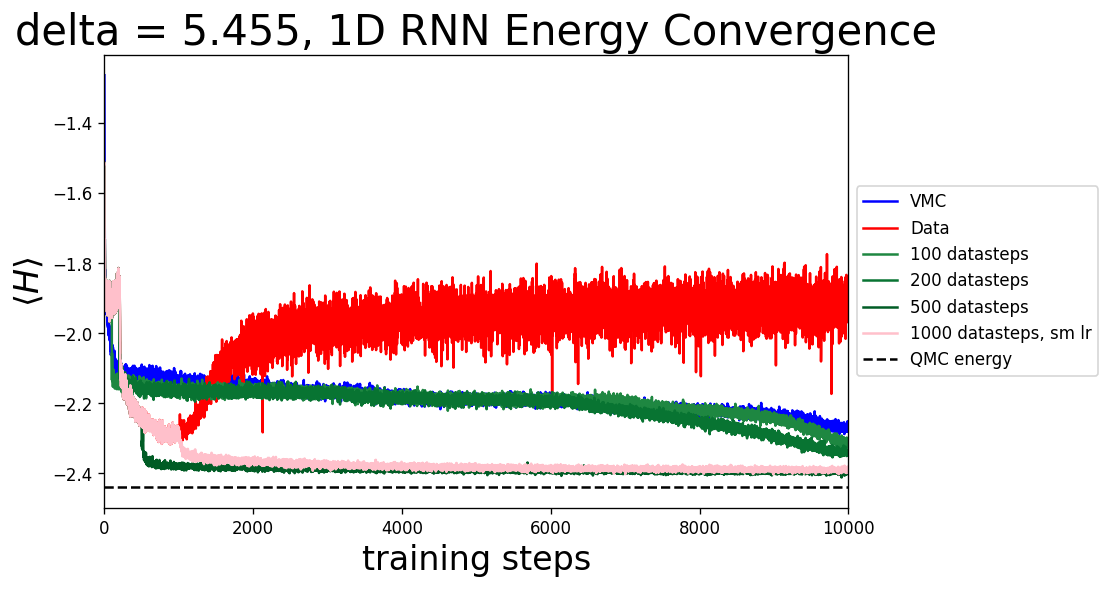

In [66]:
plot_all_1dEcurves_fig3(delta_1,energies[index],[0,10000],[None,None])

In [46]:
delta_2 = 4.955
index = np.where(deltas==delta_2)

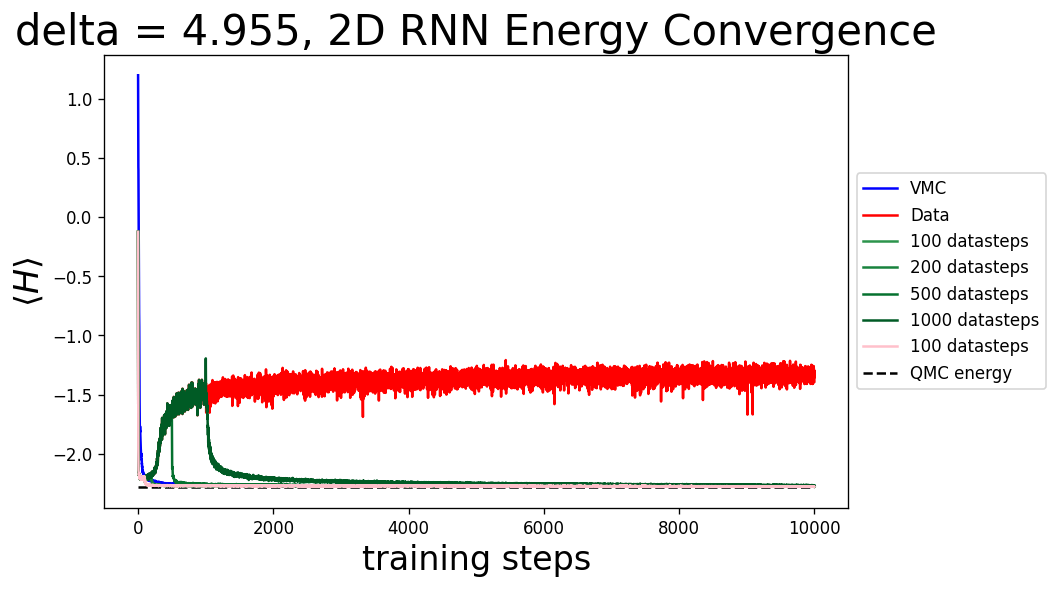

In [47]:
plot_all_2dEcurves_fig3(delta_2,energies[index],[None,None],[None,None])

### Get best energies from trained models

In [48]:
def movingaverage(values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [67]:
def GetBestEs1(delta,moving_avg_fxn,window):
    
    # Read in the data
    path1 = './../data/N_256/Figure3/OneD_rnn/delta_'
    delta_s = str('%.3f' %delta)
    seed = '/seed_111'
    VMC = '/VMC_only'
    hybrid = '/hybrid_training/'
    ds = '_datasteps'
    lr = 'lr_0.001/'
    Energy = '/Energy.npy'
    
    VMC_train1 = np.load(path1+delta_s+seed+VMC+Energy)
    Data_train1 = np.load(path1+delta_s+seed+Energy)
    Hybrid_trains1 = np.atleast_2d(np.load(path1+delta_s+seed+hybrid+lr+'100'+ds+Energy)[0:10000])
    Hybrid_trains1 = np.append(Hybrid_trains1,np.atleast_2d(np.load(path1+delta_s+seed+hybrid+lr+'200'+ds+Energy)[0:10000]),axis=0)
    Hybrid_trains1 = np.append(Hybrid_trains1,np.atleast_2d(np.load(path1+delta_s+seed+hybrid+lr+'500'+ds+Energy)[0:10000]),axis=0)
    Hybrid_trains1 = np.append(Hybrid_trains1,np.atleast_2d(np.load(path1+delta_s+seed+hybrid+lr+'1000'+ds+Energy)[0:10000]),axis=0)
    sm_lr = np.load(f'./../data/N_256/Figure3/OneD_rnn/delta_{delta}/seed_111/hybrid_training/1000_datasteps/Energy.npy')
    
    # Take best of moving average for each model
    VMC_E = np.min(moving_avg_fxn(VMC_train1,window))
    Data_E = np.min(moving_avg_fxn(Data_train1,window))
    Hybrid100_E = np.min(moving_avg_fxn(Hybrid_trains1[0,:],window))
    Hybrid200_E = np.min(moving_avg_fxn(Hybrid_trains1[1,:],window))
    Hybrid500_E = np.min(moving_avg_fxn(Hybrid_trains1[2,:],window))
    Hybrid1000_E = np.min(moving_avg_fxn(Hybrid_trains1[3,:],window))
    Hybrid_smlr = np.min(moving_avg_fxn(sm_lr,window))
    
    return VMC_E, Data_E, Hybrid100_E, Hybrid200_E, Hybrid500_E, Hybrid1000_E,Hybrid_smlr

def GetBestEs2(delta,moving_avg_fxn,window):
    
    # Read in the data
    path2 = './../data/N_256/Figure3/TwoD_rnn/delta_'
    delta_s = str('%.3f' %delta)
    seed = '/seed_111'
    VMC = '/VMC_only'
    hybrid = '/hybrid_training/'
    ds = '_datasteps'
    lr = 'lr_0.001/'
    Energy = '/Energy.npy'
    VMC_train2 = np.load(path2+delta_s+seed+VMC+Energy)
    Data_train2 = np.load(path2+delta_s+seed+Energy)
    Hybrid_trains2 = np.atleast_2d(np.load(path2+delta_s+seed+hybrid+lr+'100'+ds+Energy)[0:10000])
    Hybrid_trains2 = np.append(Hybrid_trains2,np.atleast_2d(np.load(path2+delta_s+seed+hybrid+lr+'200'+ds+Energy)[0:10000]),axis=0)
    Hybrid_trains2 = np.append(Hybrid_trains2,np.atleast_2d(np.load(path2+delta_s+seed+hybrid+lr+'500'+ds+Energy)[0:10000]),axis=0)
    Hybrid_trains2 = np.append(Hybrid_trains2,np.atleast_2d(np.load(path2+delta_s+seed+hybrid+lr+'1000'+ds+Energy)[0:10000]),axis=0)
    
    # Take best of moving average for each model
    VMC_E = np.min(moving_avg_fxn(VMC_train2,window))
    Data_E = np.min(moving_avg_fxn(Data_train2,window))
    Hybrid100_E = np.min(moving_avg_fxn(Hybrid_trains2[0,:],window))
    Hybrid200_E = np.min(moving_avg_fxn(Hybrid_trains2[1,:],window))
    Hybrid500_E = np.min(moving_avg_fxn(Hybrid_trains2[2,:],window))
    Hybrid1000_E = np.min(moving_avg_fxn(Hybrid_trains2[3,:],window))
    
    return VMC_E, Data_E, Hybrid100_E, Hybrid200_E, Hybrid500_E, Hybrid1000_E

In [68]:
vmces1 = []
dataes1 = []
hy100es1 = []
hy200es1 = []
hy500es1 = []
hy1000es1 = []
smlrs = []
vmces2 = []
dataes2 = []
hy100es2 = []
hy200es2 = []
hy500es2 = []
hy1000es2 = []

for delta_ in deltas:
    vmce1, datae1, hy100_1, hy200_1, hy500_1, hy1000_1,smlr = GetBestEs1(delta_,movingaverage,50)
    vmce2, datae2, hy100_2, hy200_2, hy500_2, hy1000_2 = GetBestEs2(delta_,movingaverage,50)
    
    vmces1.append(vmce1)
    dataes1.append(datae1)
    hy100es1.append(hy100_1)
    hy200es1.append(hy200_1)
    hy500es1.append(hy500_1)
    hy1000es1.append(hy1000_1)
    smlrs.append(smlr)
    vmces2.append(vmce2)
    dataes2.append(datae2)
    hy100es2.append(hy100_2)
    hy200es2.append(hy200_2)
    hy500es2.append(hy500_2)
    hy1000es2.append(hy1000_2)


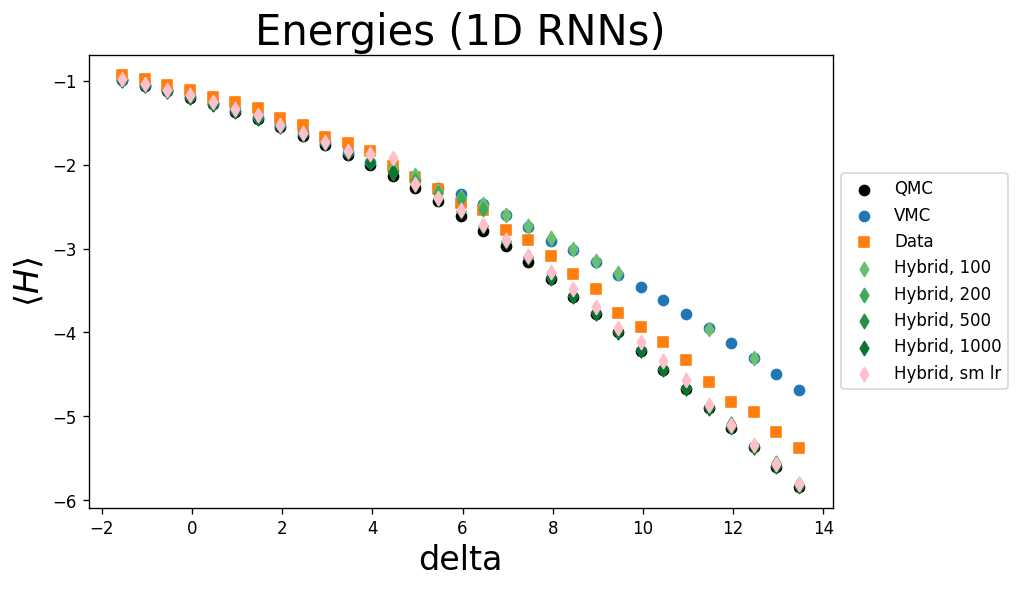

In [70]:
fig = plt.figure(1,figsize=(8,5), dpi=120, facecolor='w', edgecolor='k')
greens = plt.get_cmap('Greens')
greens = greens(np.linspace(0, 1, 20))[10:]
plt.scatter(deltas,energies,color='k',label="QMC")
plt.scatter(deltas,vmces1,marker = 'o',color='C0',label="VMC")
plt.scatter(deltas,dataes1,marker = 's',color='C1',label="Data")
plt.scatter(deltas,hy100es1,marker = 'd',color=greens[0],label="Hybrid, 100")
plt.scatter(deltas,hy200es1,marker = 'd',color=greens[2],label="Hybrid, 200")
plt.scatter(deltas,hy500es1,marker = 'd',color=greens[4],label="Hybrid, 500")
plt.scatter(deltas,hy1000es1,marker = 'd',color=greens[6],label="Hybrid, 1000")
plt.scatter(deltas,smlrs,marker = 'd',color='pink',label="Hybrid, sm lr")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(f'Energies (1D RNNs)',fontsize=25)
plt.ylabel('$\\langle H \\rangle$',fontsize=20)
plt.xlabel('delta',fontsize=20)
plt.show()

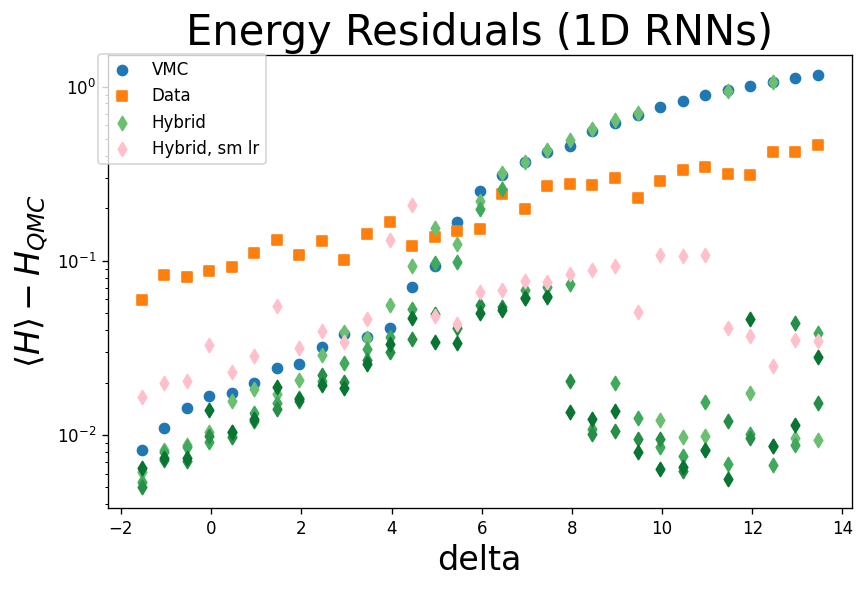

In [71]:
fig = plt.figure(1,figsize=(8,5), dpi=120, facecolor='w', edgecolor='k')
greens = plt.get_cmap('Greens')
greens = greens(np.linspace(0, 1, 20))[10:]
plt.scatter(deltas,abs(vmces1-energies),marker = 'o',color='C0',label="VMC")
plt.scatter(deltas,abs(dataes1-energies),marker = 's',color='C1',label="Data")
plt.scatter(deltas,abs(hy100es1-energies),marker = 'd',color=greens[0],label="Hybrid")
plt.scatter(deltas,abs(hy200es1-energies),marker = 'd',color=greens[2])
plt.scatter(deltas,abs(hy500es1-energies),marker = 'd',color=greens[4])
plt.scatter(deltas,abs(hy1000es1-energies),marker = 'd',color=greens[6])
plt.scatter(deltas,abs(smlrs-energies),marker = 'd',color='pink',label="Hybrid, sm lr")
plt.legend(loc='center', bbox_to_anchor=(0.1, 0.88))
plt.title(f'Energy Residuals (1D RNNs)',fontsize=25)
plt.ylabel('$\\langle H \\rangle - H_{QMC}$',fontsize=20)
plt.xlabel('delta',fontsize=20)
plt.yscale('log')
plt.show()

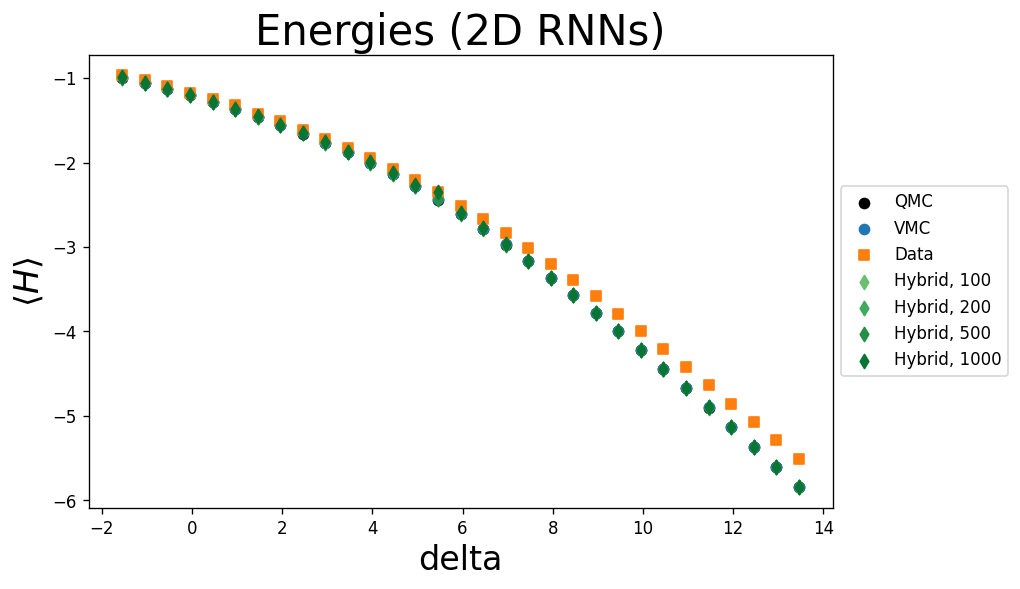

In [22]:
fig = plt.figure(1,figsize=(8,5), dpi=120, facecolor='w', edgecolor='k')
greens = plt.get_cmap('Greens')
greens = greens(np.linspace(0, 1, 20))[10:]
plt.scatter(deltas,energies,color='k',label="QMC")
plt.scatter(deltas,vmces2,marker = 'o',color='C0',label="VMC")
plt.scatter(deltas,dataes2,marker = 's',color='C1',label="Data")
plt.scatter(deltas,hy100es2,marker = 'd',color=greens[0],label="Hybrid, 100")
plt.scatter(deltas,hy200es2,marker = 'd',color=greens[2],label="Hybrid, 200")
plt.scatter(deltas,hy500es2,marker = 'd',color=greens[4],label="Hybrid, 500")
plt.scatter(deltas,hy1000es2,marker = 'd',color=greens[6],label="Hybrid, 1000")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(f'Energies (2D RNNs)',fontsize=25)
plt.ylabel('$\\langle H \\rangle$',fontsize=20)
plt.xlabel('delta',fontsize=20)
plt.show()

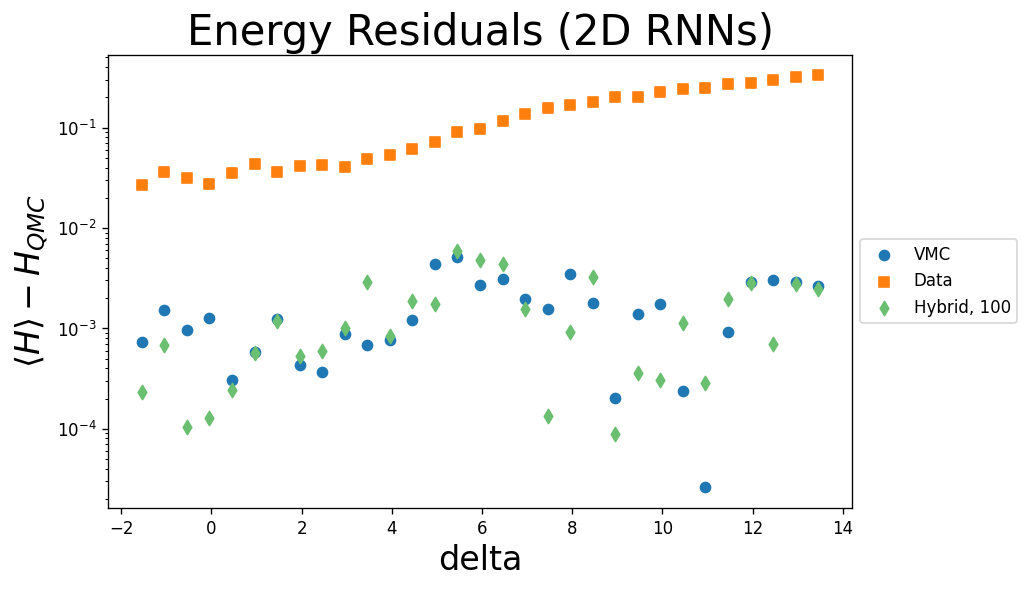

In [108]:
fig = plt.figure(1,figsize=(8,5), dpi=120, facecolor='w', edgecolor='k')
greens = plt.get_cmap('Greens')
greens = greens(np.linspace(0, 1, 20))[10:]
plt.scatter(deltas,abs(vmces2-energies),marker = 'o',color='C0',label="VMC")
plt.scatter(deltas,abs(dataes2-energies),marker = 's',color='C1',label="Data")
plt.scatter(deltas,abs(hy100es2-energies),marker = 'd',color=greens[0],label="Hybrid, 100")
# plt.scatter(deltas,abs(hy200es2-energies),marker = 'd',color=greens[2],label="Hybrid, 200")
# plt.scatter(deltas,abs(hy500es2-energies),marker = 'd',color=greens[4],label="Hybrid, 500")
# plt.scatter(deltas,abs(hy1000es2-energies),marker = 'd',color=greens[6],label="Hybrid, 1000")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(f'Energy Residuals (2D RNNs)',fontsize=25)
plt.ylabel('$\\langle H \\rangle - H_{QMC}$',fontsize=20)
plt.xlabel('delta',fontsize=20)
plt.yscale('log')
plt.show()